<a href="https://colab.research.google.com/github/Femi-90/My-works/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
sns.set_theme(context='notebook',style="ticks")
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/used_car_dataset.csv")
data.sample(7)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
825,Tata,Indica Vista,2009,15,"80,000 km",Manual,second,Petrol,Nov-24,Tata Indica Vista 2009 Petrol Well Maintained,"₹ 1,00,000"
5028,Toyota,Corolla Altis,2015,9,"78,000 km",Automatic,first,Hybrid/CNG,Nov-24,Corolla Altis 2015 CNG & Hybrids complete new ...,"₹ 8,01,000"
4327,Mahindra,Scorpio,2016,8,"90,000 km",Manual,second,Diesel,Nov-24,"Mahindra Scorpio S10, 2016, Diesel","₹ 10,40,000"
3829,Volkswagen,VentoTest,2017,7,"74,528 km",Automatic,first,Petrol,Nov-24,"Volkswagen Vento, 2017, Petrol","₹ 7,75,000"
6802,Maruti Suzuki,Swift,2024,0,"2,000 km",Automatic,first,Hybrid/CNG,Nov-24,Maruti Suzuki Swift 2024,"₹ 9,00,000"
444,Honda,City ZX,2024,0,NaN,Automatic,first,Petrol,Nov-24,Honda City,"₹ 15,50,000"
5237,Maruti Suzuki,Swift-Dzire,2020,4,"19,150 km",Automatic,first,Petrol,Nov-24,Maruti Suzuki Swift Dzire 2020,"₹ 7,00,000"


# **DATA EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [ ]:
data.columns = data.columns.str.lower()

Drop Nan values from kmdriven

In [ ]:
data = data.dropna(subset='kmdriven').reset_index(drop=True)

In [ ]:
data.describe()

,year,age
count,9535.000000,9535.000000
mean,2016.375669,7.624331
std,4.071090,4.071090
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


FEATURE EXTRACTION AND ENGINEERING

In [ ]:
data['kmdriven'] = data['kmdriven'].astype(str).str.replace('km','').str.replace(',','').str.strip().apply(lambda x: int(float(x)))
data['askprice'] = data['askprice'].astype(str).str.replace(',','').str.replace('₹','').str.strip().apply(lambda x: int(x))

In [ ]:
totalCompanies = data['brand'].nunique()
top_10_car_companies = data['brand'].value_counts().head(10).index.tolist()
top_10_df = data[data['brand'].isin(top_10_car_companies)]
totalCompanies

38

In [ ]:
perc = data['brand'].isin(top_10_car_companies).sum()/data.shape[0]*100

print(f'Out of {totalCompanies} companies top 10 campies own {perc:.2f}% of the market')

Out of 38 companies top 10 campies own 84.53% of the market


In [ ]:
data.describe()

,year,age,kmdriven,askprice
count,9535.000000,9535.000000,9535.000000,9.535000e+03
mean,2016.375669,7.624331,70605.891453,1.067161e+06
std,4.071090,4.071090,56308.596299,1.661675e+06
min,1986.000000,0.000000,0.000000,1.500000e+04
25%,2014.000000,5.000000,43000.000000,3.650000e+05
50%,2017.000000,7.000000,65000.000000,5.999990e+05
75%,2019.000000,10.000000,86000.000000,1.140000e+06
max,2024.000000,38.000000,980002.000000,4.250000e+07


UNIVARIATE ANALYSIS


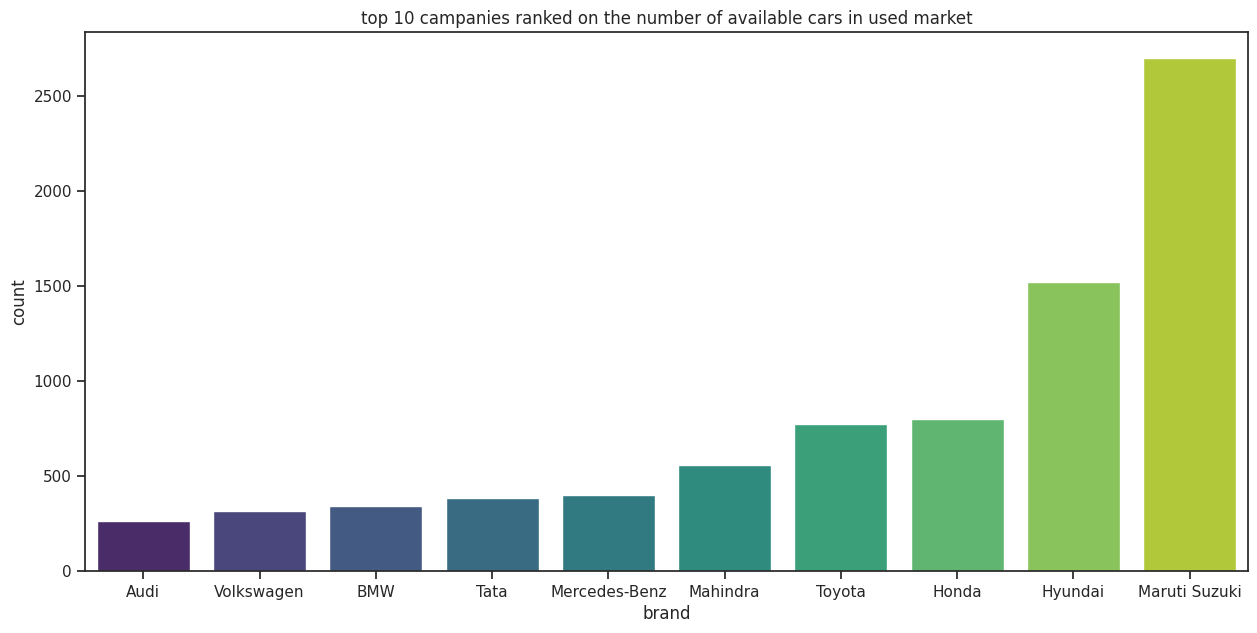

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_10_df, x='brand',palette='viridis',order=top_10_df['brand'].value_counts(ascending=True).index)
# plt.xticks(rotation=45)
_ = plt.title('top 10 campanies ranked on the number of available cars in used market')

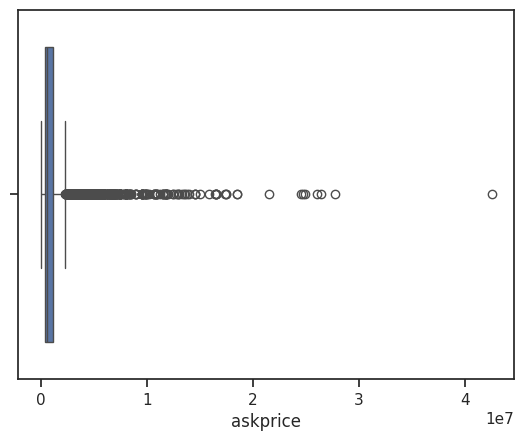

In [ ]:
sns.boxplot(x=data['askprice'])
plt.show()

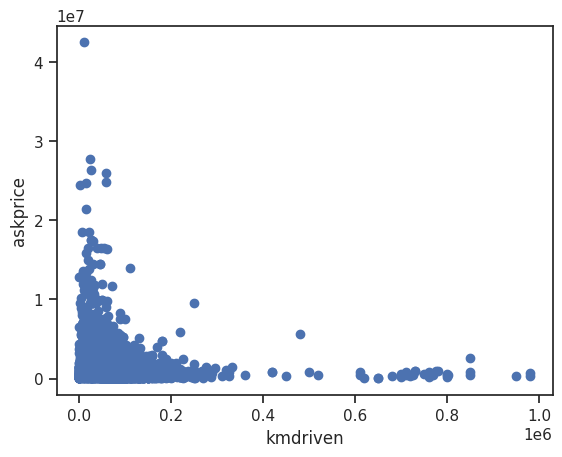

In [ ]:
plt.scatter(data['kmdriven'], data['askprice'])
plt.xlabel('kmdriven')
plt.ylabel('askprice')
plt.show()

<Axes: title={'center': 'top 10 most selling cars in used car market'}, ylabel='model'>

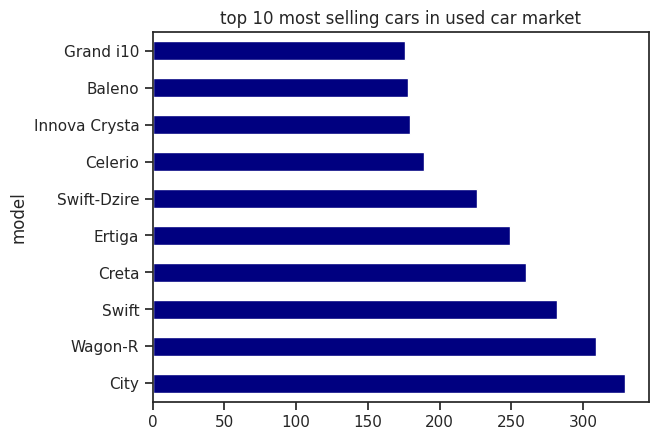

In [ ]:
top_10_df['model'].value_counts().head(10).plot(kind='barh',title='top 10 most selling cars in used car market',colormap='jet')

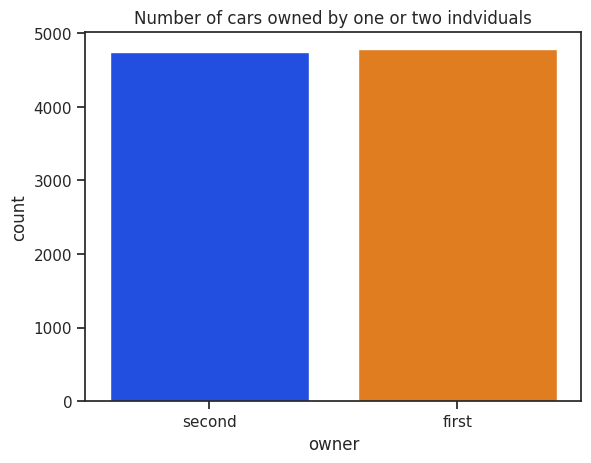

In [ ]:
sns.countplot(data=data,x='owner',palette='bright')
_ = plt.title('Number of cars owned by one or two indviduals')

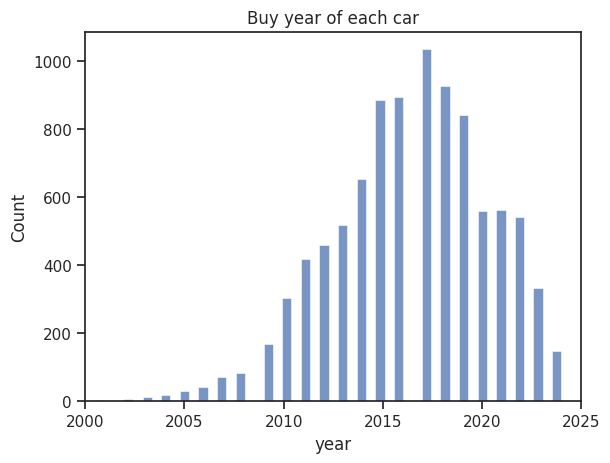

In [ ]:
sns.histplot(data=data, x='year')
plt.title('Buy year of each car')
_ = plt.xlim(2000,2025)

Text(0, 0.5, 'Count')

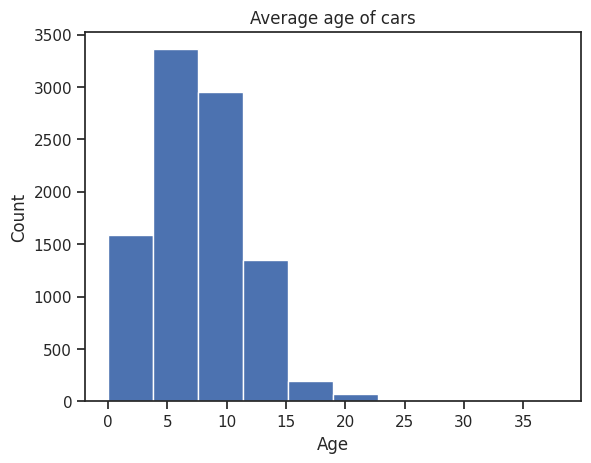

In [ ]:
plt.hist(x=data['age'])
plt.title('Average age of cars')
plt.xlabel('Age')
plt.ylabel('Count')

False

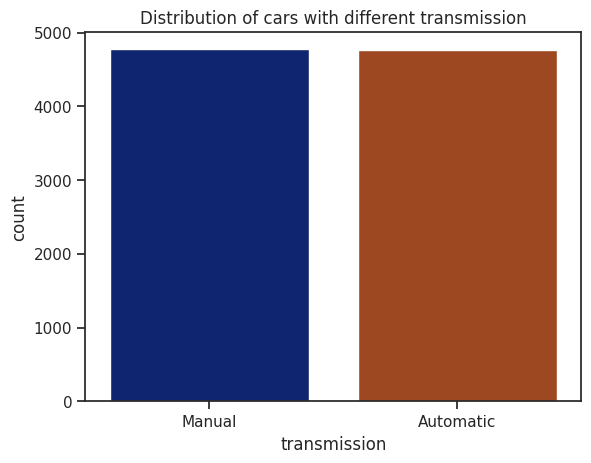

In [ ]:
sns.countplot(data=data, x='transmission',palette='dark') == plt.title('Distribution of cars with different transmission')

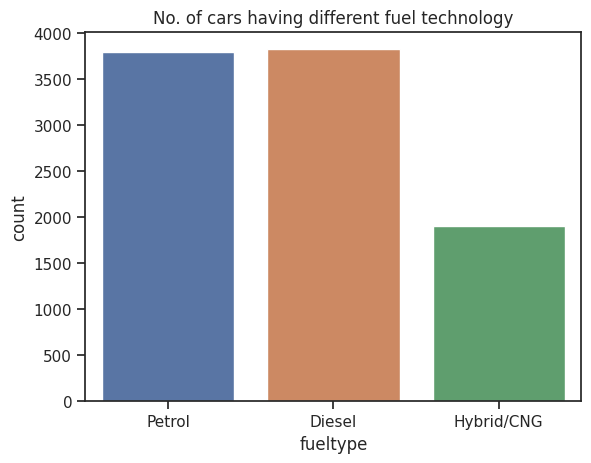

In [ ]:
sns.countplot(data=data, x='fueltype',palette='deep')
_ = plt.title('No. of cars having different fuel technology')

BIVARIATE ANALYSIS

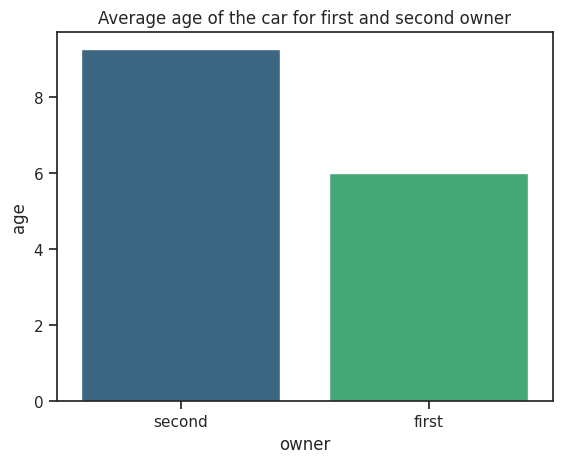

In [ ]:
sns.barplot(data=data, x='owner',y='age',estimator='mean',errorbar=None,palette='viridis')
_ = plt.title('Average age of the car for first and second owner')

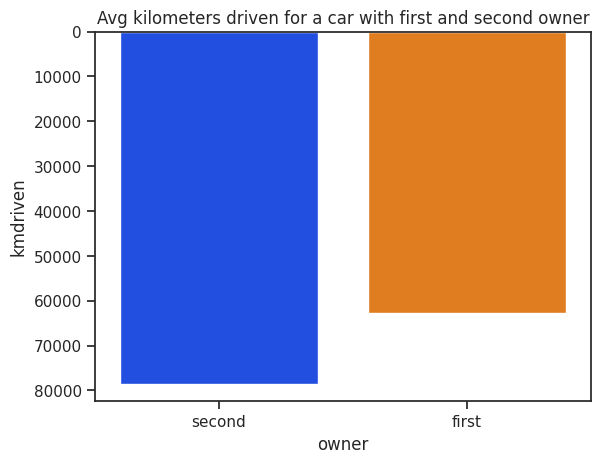

In [ ]:
sns.barplot(data=data, x='owner',y='kmdriven',estimator='mean',errorbar=None,palette='bright') == plt.title('Avg kilometers driven for a car with first and second owner')
plt.gca().invert_yaxis()

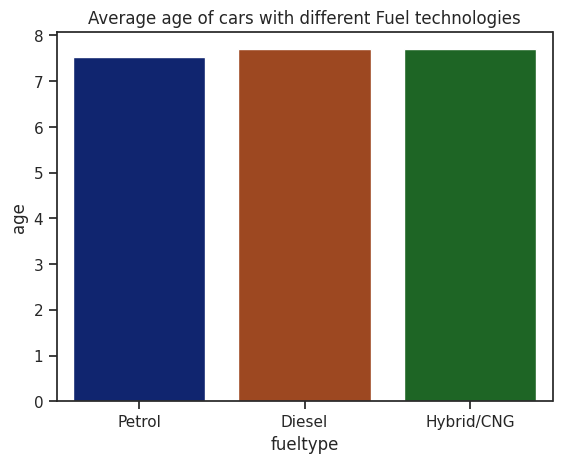

In [ ]:
sns.barplot(data=data, x='fueltype',y='age',estimator='mean',errorbar=None,palette='dark')
_ = plt.title('Average age of cars with different Fuel technologies')

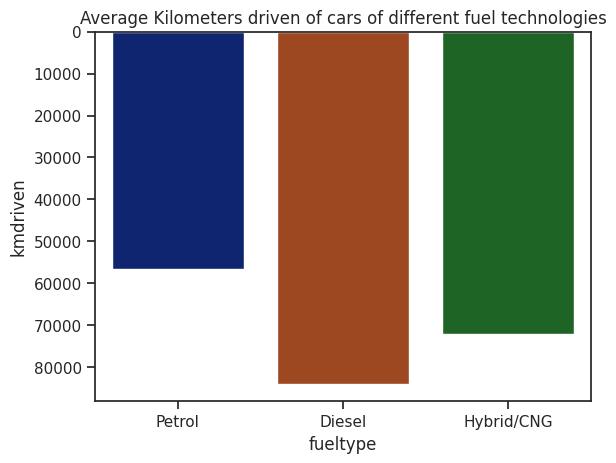

In [ ]:
sns.barplot(data=data, x='fueltype',y='kmdriven',estimator='mean',errorbar=None,palette='dark')
_ = plt.title('Average Kilometers driven of cars of different fuel technologies')
plt.gca().invert_yaxis()


# BUILDING THE MODEL

Create a new feature "age"

In [ ]:
import datetime
currentYear = datetime.datetime.now().year
data['age'] = currentYear - data['year']


create a new feature, km driven per year

In [ ]:
data['km_per_year'] = data['kmdriven'] / data['age']

In [ ]:
data.head(3)

,brand,model,year,age,kmdriven,transmission,owner,fueltype,posteddate,additioninfo,askprice,km_per_year
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",195000,4260.869565
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000,12666.666667
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999,5517.571429


In [ ]:
le = LabelEncoder()

# Fit and transform the 'transmission' column
data['transmission_encoded'] = le.fit_transform(data['transmission'])

# Fit and transform the 'fueltype' column
data['fueltype_encoded'] = le.fit_transform(data['fueltype'])

# Fit and transform the 'owner' column
data['owner_encoded'] = le.fit_transform(data['owner'])

data['model_encoded'] = le.fit_transform(data['model'])

data = data[pd.to_numeric(data['askprice'], errors='coerce').notnull()]
# Then convert 'askprice' to numeric:
data['askprice'] = pd.to_numeric(data['askprice'])


In [ ]:
data.head(5)

,brand,model,year,age,kmdriven,transmission,owner,fueltype,posteddate,additioninfo,askprice,km_per_year,transmission_encoded,fueltype_encoded,owner_encoded,model_encoded
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",195000,4260.869565,1,2,1,84
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000,12666.666667,1,0,1,187
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999,5517.571429,1,0,0,345
3,Maruti Suzuki,Swift,2017,7,83500,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000,11928.571429,1,0,1,316
4,Maruti Suzuki,Baleno,2019,5,45000,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",685000,9000.000000,0,2,0,52


Selecting the best features to predict Asking price


In [ ]:
Q1 = data['kmdriven'].quantile(0.25)
Q3 = data['kmdriven'].quantile(0.75)
IQR = Q3 - Q1

Q1_price = data['askprice'].quantile(0.25)
Q3_price = data['askprice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

In [ ]:
brand_encoder = LabelEncoder()

# Fit and transform the 'brand' column
data['brand_encoded'] = brand_encoder.fit_transform(data['brand'])

X = data[['year', 'kmdriven','brand_encoded', 'model_encoded']]
y = data['askprice']

X.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in X.columns:
    if X[col].isnull().any():  # Check for NaNs
        # For numerical features, you can use imputation with mean or median
        if pd.api.types.is_numeric_dtype(X[col]):
            X[col] = X[col].fillna(X[col].mean())
        # For categorical features, consider imputation with the most frequent value
        else:
            X[col] = X[col].fillna(X[col].mode()[0])

model = DecisionTreeRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

brand_encoded    0.461916
model_encoded    0.205930
kmdriven         0.200282
year             0.131871
dtype: float64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535 entries, 0 to 9534
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           9535 non-null   int64
 1   kmdriven       9535 non-null   int64
 2   brand_encoded  9535 non-null   int64
 3   model_encoded  9535 non-null   int64
dtypes: int64(4)
memory usage: 298.1 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9535 entries, 0 to 9534
Series name: askprice
Non-Null Count  Dtype
--------------  -----
9535 non-null   int64
dtypes: int64(1)
memory usage: 74.6 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Fit the model on the training data
#model = DecisionTreeRegressor(max_depth=6)
#model.fit(X_train, y_train)

In [ ]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict on the test set
y_pred = model2.predict(X_test)

# Evaluate the model's performance
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy (R-squared): {accuracy}")

Accuracy (R-squared): 0.7194645422872856
